<a href="https://colab.research.google.com/github/ryhy/OxfordUniversityDictionaryAPI/blob/master/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
# show upload dialog
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
# テキストデータを読み込む
train_df = pd.read_csv(io.StringIO(uploaded['train_data.csv'].decode('utf-8')), index_col=0)
test_df = pd.read_csv(io.StringIO(uploaded['test_data.csv'].decode('utf-8')), index_col=0)

Saving test_data.csv to test_data (2).csv
Saving train_data.csv to train_data (3).csv


In [0]:
def createData():
  # remove "salary" colum from csv
  # filtered_data = train_df.query('age == 20 and sex == 1')
  X_train = train_df.iloc[:, :-1] # data
  Y_train = train_df.iloc[:, -1:] # salary
  X_test = train_df.iloc[:, :-1]

  colums = ['area', 'education', 'position'];
  x_train_final = pd.get_dummies(X_train, columns=colums, drop_first=True)
  x_test_final = pd.get_dummies(X_test, columns=colums, drop_first=True)
  return {'X_train': x_train_final, 'Y_train': Y_train, 'X_test': x_test_final}

# データセットの生成 - データの分離/前処理/
trained_data = createData()
X_train = trained_data['X_train']
Y_train = trained_data['Y_train']

X_test = trained_data['X_test']

,position,age,area,sex,partner,num_child,education,service_length,study_time,commute,overtime,salary
id,,,,,,,,,,,,
48,0,20,広島県,1,1,3,0,1,5.0,0.9,13.6,254.344236
138,0,20,三重県,1,1,1,0,0,5.0,1.2,11.2,213.399887
458,0,20,愛媛県,1,1,2,0,0,1.0,1.0,13.8,241.245471
471,0,20,愛知県,1,1,4,0,2,0.0,1.0,10.4,264.109810
571,0,20,徳島県,1,0,0,0,2,0.0,0.2,17.6,198.077967
...,...,...,...,...,...,...,...,...,...,...,...,...
20767,1,20,高知県,1,0,0,0,0,4.0,0.5,12.6,219.711664
20801,0,20,長野県,1,1,1,0,1,0.0,1.0,12.2,193.156702
20858,0,20,岩手県,1,0,0,0,0,1.0,0.1,13.1,177.028800


In [379]:
X_train.head()

,age,sex,partner,num_child,service_length,study_time,commute,overtime,area_京都府,area_佐賀県,area_兵庫県,area_北海道,area_千葉県,area_和歌山県,area_埼玉県,area_大分県,area_大阪府,area_奈良県,area_宮城県,area_宮崎県,area_富山県,area_山口県,area_山形県,area_山梨県,area_岐阜県,area_岡山県,area_岩手県,area_島根県,area_広島県,area_徳島県,area_愛媛県,area_愛知県,area_新潟県,area_東京都,area_栃木県,area_沖縄県,area_滋賀県,area_熊本県,area_石川県,area_神奈川県,area_福井県,area_福岡県,area_福島県,area_秋田県,area_群馬県,area_茨城県,area_長崎県,area_長野県,area_青森県,area_静岡県,area_香川県,area_高知県,area_鳥取県,area_鹿児島県,education_1,education_2,education_3,education_4,position_1,position_2,position_3,position_4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44,2,1,2,24,2.0,1.6,9.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,31,1,0,0,13,9.0,0.7,12.4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,36,1,0,0,14,4.0,0.4,16.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22,2,0,0,4,3.0,0.4,6.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,2,0,0,5,3.0,0.2,4.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [380]:
Y_train.head()

,salary
id,
0,428.074887
1,317.930517
2,357.350316
3,201.310911
4,178.067475


In [381]:
X_test.head()


,age,sex,partner,num_child,service_length,study_time,commute,overtime,area_京都府,area_佐賀県,area_兵庫県,area_北海道,area_千葉県,area_和歌山県,area_埼玉県,area_大分県,area_大阪府,area_奈良県,area_宮城県,area_宮崎県,area_富山県,area_山口県,area_山形県,area_山梨県,area_岐阜県,area_岡山県,area_岩手県,area_島根県,area_広島県,area_徳島県,area_愛媛県,area_愛知県,area_新潟県,area_東京都,area_栃木県,area_沖縄県,area_滋賀県,area_熊本県,area_石川県,area_神奈川県,area_福井県,area_福岡県,area_福島県,area_秋田県,area_群馬県,area_茨城県,area_長崎県,area_長野県,area_青森県,area_静岡県,area_香川県,area_高知県,area_鳥取県,area_鹿児島県,education_1,education_2,education_3,education_4,position_1,position_2,position_3,position_4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44,2,1,2,24,2.0,1.6,9.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,31,1,0,0,13,9.0,0.7,12.4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,36,1,0,0,14,4.0,0.4,16.9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,22,2,0,0,4,3.0,0.4,6.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,2,0,0,5,3.0,0.2,4.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


(array([ 988., 2165., 4797., 1612., 1053.,  681., 1183.,  908., 1548.,
        1015.,  990., 1424.,  798.,  947.,  400.,  316.,  103.,   48.,
          11.,   13.]),
 array([18.  , 20.45, 22.9 , 25.35, 27.8 , 30.25, 32.7 , 35.15, 37.6 ,
        40.05, 42.5 , 44.95, 47.4 , 49.85, 52.3 , 54.75, 57.2 , 59.65,
        62.1 , 64.55, 67.  ]),
 <a list of 20 Patch objects>)

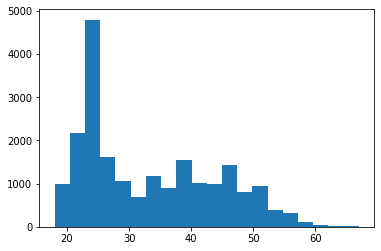

In [390]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.hist(train_df['salary'], bins=100)
plt.hist(X_train['age'], bins=20)

In [395]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=2525)
# model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#                      max_features='auto', max_leaf_nodes=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
#                      oob_score=False, random_state=2525, verbose=0,
#                      warm_start=False)
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=2525, verbose=0,
                      warm_start=False)

In [396]:
from sklearn.metrics import mean_absolute_error 
predicted_salary = model.predict(X_train)
print(mean_absolute_error(predicted_salary, Y_train))
# 9.381901130006629

9.460294037897427


(array([1.9418e+04, 1.2270e+03, 2.2800e+02, 7.8000e+01, 2.8000e+01,
        1.0000e+01, 7.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0.        ,  24.8016062 ,  49.6032124 ,  74.4048186 ,
         99.20642479, 124.00803099, 148.80963719, 173.61124339,
        198.41284959, 223.21445579, 248.01606199]),
 <a list of 10 Patch objects>)

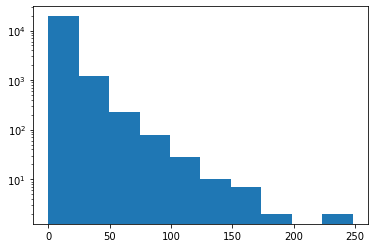

In [397]:
import numpy as np
salary_data = Y_train['salary'].values
data = np.abs(predicted_salary - salary_data)
plt.hist(data, log=True)

In [399]:
test_predicted = model.predict(X_test)
submit_df = pd.DataFrame({'y': test_predicted})
submit_df
# submit_df.index.name = 'id';
# submit_df.to_csv('submission.csv');

,y
0,416.303418
1,323.827081
2,352.376142
3,191.169149
4,173.684999
...,...
20995,196.021952
20996,197.738560
20997,377.979356
20998,235.307575


(array([1.9418e+04, 1.2270e+03, 2.2800e+02, 7.8000e+01, 2.8000e+01,
        1.0000e+01, 7.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  0.        ,  24.8016062 ,  49.6032124 ,  74.4048186 ,
         99.20642479, 124.00803099, 148.80963719, 173.61124339,
        198.41284959, 223.21445579, 248.01606199]),
 <a list of 10 Patch objects>)

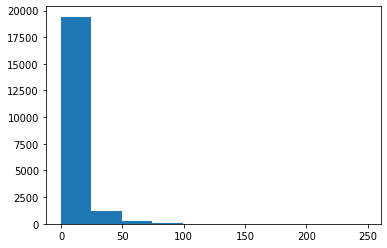

In [413]:
import numpy as np
salary_values = Y_train['salary'].values
data = np.abs(test_predicted - salary_values)
plt.hist(data, log=False)

In [350]:
values = Y_train['salary']
worst_index = np.argmax(predicted_salary - values.values)
best_index = np.argmin(predicted_salary - values.values)

best_index
# print(predicted[worst_index], Y_train['salary'].iloc[worst_index])
# 669.5488881368135 421.52210195900886


303

In [404]:
X_train.iloc[best_index, :]

age               40.0
sex                2.0
partner            0.0
num_child          0.0
service_length    18.0
                  ... 
education_4        0.0
position_1         0.0
position_2         1.0
position_3         0.0
position_4         0.0
Name: 303, Length: 62, dtype: float64

In [405]:
Y_train.iloc[best_index, :]

salary    351.36796
Name: 303, dtype: float64

In [326]:
type(values.values)

numpy.ndarray

In [327]:
np.argmax(predicted - values.values)

498